In [40]:
from sklearn.datasets import fetch_olivetti_faces
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
%matplotlib inline

In [3]:
data = fetch_olivetti_faces()

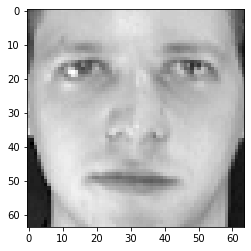

In [13]:
plt.imshow(data.images[0], cmap=plt.cm.gray)
plt.show()

In [10]:
data.data.shape

(400, 4096)

In [11]:
data.images.shape

(400, 64, 64)

In [24]:
X = data.images[:,:32].reshape(400,-1)
y = data.images[:,32:].reshape(400,-1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=10)

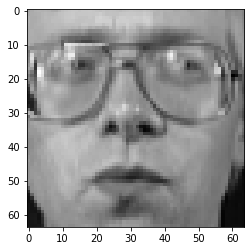

In [39]:
index = np.random.randint(390,size=1)[0]
X_up = X[index].reshape(32,64)
Y_down = Y[index].reshape(32,64)
XY = np.vstack([X_up,Y_down])
plt.imshow(XY, cmap=plt.cm.gray)

In [42]:
estimators = {}
estimators['KNN'] = KNeighborsRegressor(n_neighbors=5)
estimators['Lasso'] = Lasso(alpha=1)
estimators['Ridge'] = Ridge(alpha=1)
estimators['LinearRegression'] = LinearRegression()

In [55]:
predict_ = {}
for key,model in estimators.items():
    model.fit(X_train,y_train)
    
    y_ = model.predict(X_test)
    predict_[key] = y_

KNN------------------------------


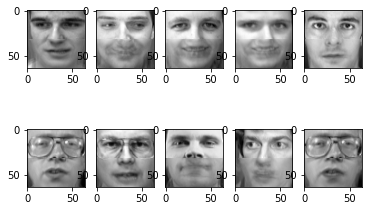

Lasso------------------------------


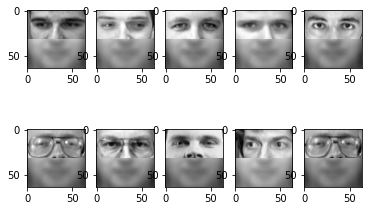

Ridge------------------------------


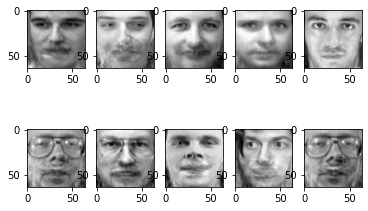

LinearRegression------------------------------


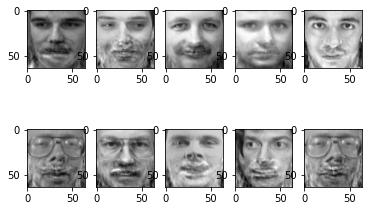

In [56]:
for key,items in predict_.items():
    i = 1
    print(key+"------------------------------")
    for X_up,y_down in zip(X_test,items):
        ax = plt.subplot(2,5,i)
        i+=1
        res = np.vstack([X_up.reshape(32,64),y_down.reshape(32,64)])
        ax.imshow(res,cmap=plt.cm.gray)
    plt.show()